# PHASE 3 SUBMISSION
PROJECT TITLE : PUBLIC TRANSPORT EFFICIENCY ANALYSIS

PHASE 3 : DEVELOPMENT PART-1
### Topic : Building project by loading and preprocessing the dataset.


### MOUNTNG DRIVE

In [31]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### SAMPLE IMAGE

A public transport efficiency project aims to improve the effectiveness and sustainability of a city or region's public transportation system. Such projects typically involve a combination of technological, infrastructural, and policy-based interventions. Here's a breakdown of key components and strategies that could be part of a public transport efficiency project.
  Here is the iimage that the sample of image for public transport analysis.

Saving image.1.jpg to image.1 (3).jpg
Uploaded file "image.1 (3).jpg" with length 53864 bytes


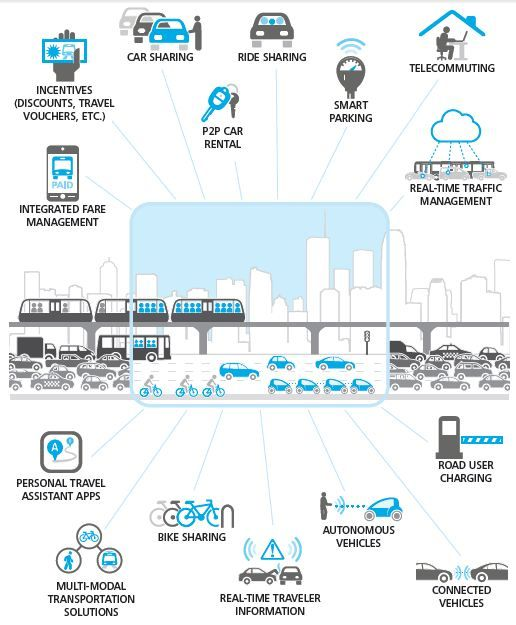

In [32]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
    from PIL import Image
from IPython.display import display
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)
display(image)

### LIBRARIES

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df=pd.read_csv('/content/drive/MyDrive/Public Transport.csv')
df

<ipython-input-34-93d7e4b8644d>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Public Transport.csv')


,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100,14156,181 Cross Rd,30-06-2013 00:00,1
1,23631,100,14144,177 Cross Rd,30-06-2013 00:00,1
2,23632,100,14132,175 Cross Rd,30-06-2013 00:00,1
3,23633,100,12266,Zone A Arndale Interchange,30-06-2013 00:00,2
4,23633,100,14147,178 Cross Rd,30-06-2013 00:00,1
...,...,...,...,...,...,...
1048570,45682,171,13929,8 Fullarton Rd,29-09-2013 00:00,2
1048571,45682,171,13758,3 Glen Osmond Rd,29-09-2013 00:00,3
1048572,45682,171,13967,9 Fullarton Rd,29-09-2013 00:00,1
1048573,45682,171,13808,5 Fullarton Rd,29-09-2013 00:00,1


In [35]:
df.describe()

,TripID,StopID,NumberOfBoardings
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.860299e+04,1.330114e+04,4.132290e+00
std,1.674656e+04,1.119243e+03,6.291338e+00
min,3.017000e+03,1.081700e+04,1.000000e+00
25%,1.162200e+04,1.269800e+04,1.000000e+00
50%,3.423400e+04,1.333500e+04,2.000000e+00
75%,4.512600e+04,1.371600e+04,4.000000e+00
max,6.258500e+04,1.849300e+04,1.930000e+02


## DATA PRE-PROCESSING TECHNIQUES
     





 It is a crucial step in any data analysis project, including public transport analysis. It involves cleaning, transforming, and organizing raw data into a format suitable for analysis. Here are steps you can take for data preprocessing in public transport analysis:
    
1.   Data Cleaning
2.   Handling missing values
3.   Data Transformation
4.   Data reduction

Checking the datatypes.





## DATA CLEANING

Here ,from the dataset we are calculating the statistical values.  

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   TripID             1048575 non-null  int64 
 1   RouteID            1048575 non-null  object
 2   StopID             1048575 non-null  int64 
 3   StopName           1048575 non-null  object
 4   WeekBeginning      1048575 non-null  object
 5   NumberOfBoardings  1048575 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 48.0+ MB


Finding the missing values.

In [37]:
df.isnull().sum()

TripID               0
RouteID              0
StopID               0
StopName             0
WeekBeginning        0
NumberOfBoardings    0
dtype: int64

Checking the duplicate values.


In [38]:
df.duplicated().sum()

0

## DATA TRANSFORMATION

Here we findng the average count of passengers per Stop in WeekBoarding using the cross-tabulation.

In [39]:
print('\n average count per route and Stop names\n')
# Technique 1: Aggregating data by time intervals (e.g., daily)
df['StopID'] = pd.to_datetime(df['StopID'])
df_daily_aggregated = df.groupby(pd.Grouper(key='StopID', freq='D')).sum().reset_index()

# Display the dataframe with daily aggregation
print("\nDataFrame with daily aggregation:")
print(df_daily_aggregated)

# Technique 2: Calculating metrics (e.g., average passenger count per route)
df_route_avg = df.groupby('StopName')['TripID'].mean().reset_index()

# Display the dataframe with average passenger count per route
print("\nAverage Passenger Count per Route:")
print(df_route_avg)

# Technique 3: Pivot table for cross-tabulation
pivot_table = df.pivot_table(index='StopID', columns='StopName', values='TripID', aggfunc='sum')

# Display the pivot table
print("\nPivot Table (Cross-tabulation):")
print(pivot_table)


 average count per route and Stop names



<ipython-input-39-49f37969c260>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily_aggregated = df.groupby(pd.Grouper(key='StopID', freq='D')).sum().reset_index()



DataFrame with daily aggregation:
      StopID       TripID  NumberOfBoardings
0 1970-01-01  29992383732            4333016

Average Passenger Count per Route:
                           StopName        TripID
0                       1 Anzac Hwy  31019.137553
1                    1 Fullarton Rd  26140.483029
2                       1 George St  28377.026277
3                  1 Glen Osmond Rd  45700.768581
4                 1 Henley Beach Rd  30380.386707
..                              ...           ...
578  Zone B Registry Rd Flinders Un  14599.031056
579   Zone B West Lakes Interchange  27447.951355
580               Zone C Moseley St  31263.491906
581      Zone D Arndale Interchange  44698.666667
582  Zone D Port Adelaide Interchan  27268.060319

[583 rows x 2 columns]

Pivot Table (Cross-tabulation):
StopName                       1 Anzac Hwy  1 Fullarton Rd  1 George St  \
StopID                                                                    
1970-01-01 00:00:00.000010817   

## DATA REDUTION

Here , the process for aggregating the data based on the Weekly Boarding  stops per route.

In [40]:
print("\nSampled DataFrame:\n")
print(df)

# Technique 2: Aggregating data (e.g., weekly aggregation)
df['WeekBeginning'] = pd.to_datetime(df['WeekBeginning'])  # Ensure 'Date' column is in datetime format
df_weekly_aggregated = df.groupby(pd.Grouper(key='WeekBeginning', freq='W')).sum().reset_index()

# Display the dataframe with weekly aggregation
print("\nDataFrame with weekly aggregation:")
print(df_weekly_aggregated)




Sampled DataFrame:

         TripID RouteID                        StopID  \
0         23631     100 1970-01-01 00:00:00.000014156   
1         23631     100 1970-01-01 00:00:00.000014144   
2         23632     100 1970-01-01 00:00:00.000014132   
3         23633     100 1970-01-01 00:00:00.000012266   
4         23633     100 1970-01-01 00:00:00.000014147   
...         ...     ...                           ...   
1048570   45682     171 1970-01-01 00:00:00.000013929   
1048571   45682     171 1970-01-01 00:00:00.000013758   
1048572   45682     171 1970-01-01 00:00:00.000013967   
1048573   45682     171 1970-01-01 00:00:00.000013808   
1048574   45682     171 1970-01-01 00:00:00.000013845   

                           StopName     WeekBeginning  NumberOfBoardings  
0                      181 Cross Rd  30-06-2013 00:00                  1  
1                      177 Cross Rd  30-06-2013 00:00                  1  
2                      175 Cross Rd  30-06-2013 00:00                

<ipython-input-40-044c7b6f8e92>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly_aggregated = df.groupby(pd.Grouper(key='WeekBeginning', freq='W')).sum().reset_index()


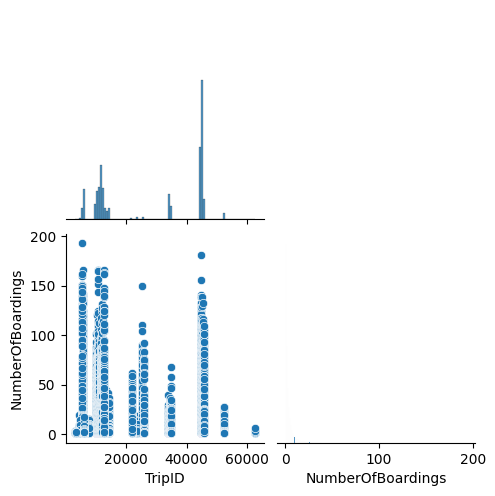

In [41]:
sns.pairplot(df,corner=True)
plt.show()


<ipython-input-43-3e11e92aa3fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='pink')


[]

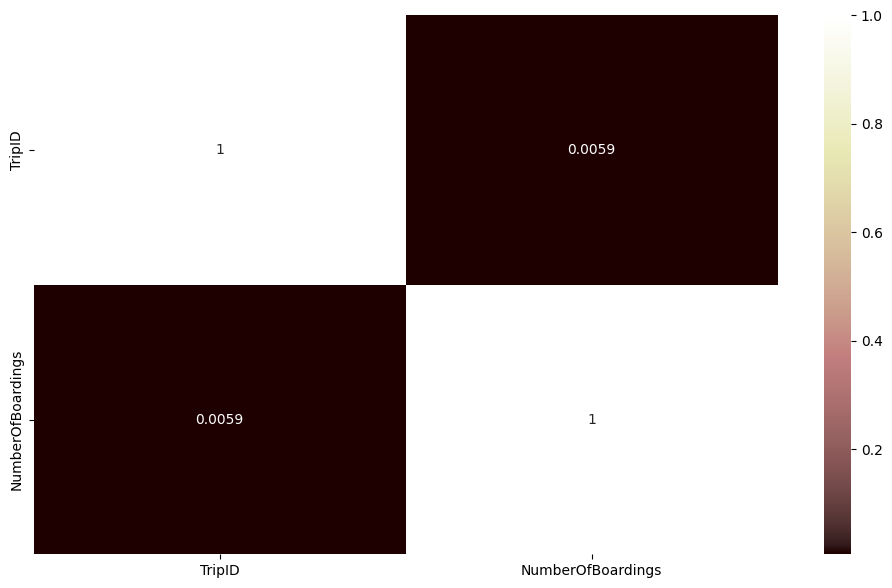

In [43]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='pink')
plt.plot()

# Conclusion

The preprocessing of the data for Public transport efficiency analysis is a critical step that lays hte foundation for meaningfull insights and decision making.Through Datacleaning, Transformation and Integration we ensure that the data accurate , complete and revalent. Proper preprocessing not only enhances the quality of analysis but also paves the way for the development of effective strategies to improve public transportation system and ultimately benefit communities and the environment.